In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np

In [2]:
resize = 1
plt.rcParams.update({
    "figure.figsize": (6.4*resize, 4.0*resize), # (6.4, 4.8)[4:3] -> (6.4, 4.0)[8:5]
    "font.sans-serif": ["Helvetica", "Nimbus Sans", "Arial", "DejaVu Sans"],
})

In [3]:
cifar_predict_mem = 25147401329.523815
cifar_measure_mem = 24289865216
cifar_measure_bs = 11147

imagenet_predict_mem = 25146805725.333332
imagenet_measure_mem = 24247172096
imagenet_measure_bs = 1345

mem_max = 25147867136

In [4]:
# relative error
cifar_error = (cifar_predict_mem - cifar_measure_mem) / cifar_measure_mem
imagenet_error = (imagenet_predict_mem - imagenet_measure_mem) / imagenet_measure_mem
print(f'cifar relative error: {cifar_error: .3f}')
print(f'imagenet relative error: {imagenet_error: .3f}')

cifar relative error:  0.035
imagenet relative error:  0.037


In [5]:
SAVE = True
fig_path = './figure'

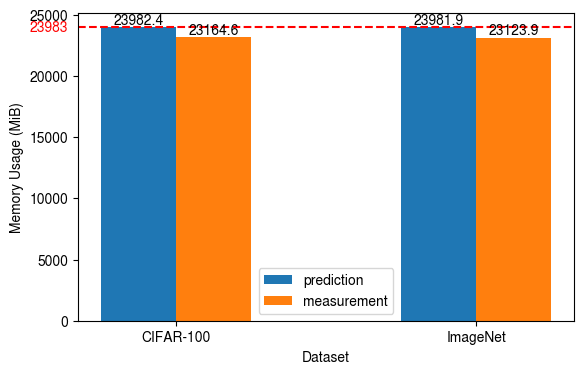

In [6]:
species = ['CIFAR-100', 'ImageNet']
mem = {
    'prediction': [i / 2**20 for i in [cifar_predict_mem, imagenet_predict_mem]],
    'measurement': [i / 2**20 for i in [cifar_measure_mem, imagenet_measure_mem]],
}
x = np.arange(len(species))
width = 0.25
multiplier = 0

fig, ax = plt.subplots()#(dpi=300)

for attribute, value in mem.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=attribute)
    ax.bar_label(rects)
    multiplier += 1

GPU_MiB = mem_max / 2**20
ax.axhline(y=GPU_MiB, color='red', linestyle='--')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, GPU_MiB, "{:.0f}".format(GPU_MiB), color="red", transform=trans, ha="right", va="center")

ax.set_ylabel('Memory Usage (MiB)')
ax.set_xlabel('Dataset')
ax.set_xticks(x + width / len(species), species)
ax.legend()

if SAVE:
    plt.savefig(f'{fig_path}/mem_usage_reg.pdf', bbox_inches="tight")
else:
    ax.set_title('Memory Usage for Training ResNet-18')
    plt.show()